In [31]:
import numpy as np
from pyDOE import *
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import minimize
import matplotlib.pyplot as plt


def calculate_average_distance(ensemble_data):
    """
    Calculate the average Euclidean distance of each ensemble's parameters to those of other ensembles.
    
    Parameters:
    ensemble_data (numpy.ndarray): A 2D array where each row represents an ensemble and each column represents a parameter.
    
    Returns:
    numpy.ndarray: A 1D array containing the average distance for each ensemble.
    """
    num_ensembles, num_parameters = ensemble_data.shape
    average_distances = np.zeros(num_ensembles)
    
    # Compute pairwise Euclidean distances
    for j in range(num_ensembles):
        distances = []
        for m in range(num_ensembles):
            if j != m:
                # Calculate the Euclidean distance between ensemble j and ensemble m
                dist = np.sqrt(np.sum((ensemble_data[j] - ensemble_data[m]) ** 2))
                distances.append(dist)
        
        # Average distance for ensemble j
        average_distances[j] = np.mean(distances)
    
    # Normalize by the number of parameters and ensembles
    normalized_distances = average_distances / (num_parameters * (num_ensembles))
    
    return normalized_distances

def create_param_ranges(file_path):
    param_ranges = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 3:
                param_name = "TEST_" + parts[0]
                param_range = (float(parts[1]), float(parts[2]))
                param_ranges[param_name] = param_range
    return param_ranges


input_file = "PPE_values.txt"
parameters_file = "parameters_for_script.txt"
def PPE_values_modify(input_file_path, parameters_file):
    # Read the parameter names from the parameters_file
    with open(parameters_file, 'r') as param_file:
        # Extract the parameter names from the file
        parameter_names = [line.split()[0] for line in param_file.read().strip().split('\n')]
    # Read the first line of the PPE_values.txt file
    with open(input_file, 'r') as file:
        lines = file.readlines()
    # Split the first line into a list of strings
    header = lines[0].strip().split()
    header = parameter_names
    # Set last 3 values to 1 
    header.extend(['INSTALL', 'START', 'END'])
    # Include the name of the simulation here
    header.insert(0, '0')
    # Join the modified header back into a single string
    new_header = ' '.join(header)
    
    # Replace the first line with the new header
    lines[0] = new_header + '\n'
    
    # Write the modified lines back to the file
    with open(input_file, 'w') as file:
        file.writelines(lines)
    
    print("Header updated successfully.")



import pandas as pd



PPE_values_modify(input_file_path, parameters_file)


Header updated successfully.


In [276]:
parameters_file = "/home/ybhatti/yusufb/Branches/PPE_Scripts/parameters_for_script.txt"
Parameters_and_ranges = create_param_ranges(parameters_file)
param_ranges = Parameters_and_ranges.values()
# Number of samples
n_samples = 150

lower = []
upper = []
names = []

for i, (low, high) in enumerate(param_ranges):
    lower.append(low)
    upper.append(high)
for i, name in enumerate(Parameters_and_ranges.items()):
    names.append(name[0])

l_bound = np.array(lower)
u_bound = np.array(upper)
names = np.array(names)

# sampler = qmc.LatinHypercube(d=23)
# sample = sampler.random(n=150)

lhs_sample = lhs(len(param_ranges), samples=n_samples, criterion='maximin')

scale = qmc.scale(sample, l_bound, u_bound)
np.savetxt("LHC_Parameters.txt", scale, delimiter=" ")

# Generate initial LHS sample

# # Scale LHS sample to parameter ranges
# scaled_samples = np.zeros_like(lhs_sample)
# for i, (low, high) in enumerate(param_ranges):
#     scaled_samples[:, i] = low + (high - low) * lhs_sample[:, i]

# # # Maximin criterion
# def min_dist(x):
#     """ Objective function to maximize the minimum pairwise distance """
#     x = x.reshape(n_samples, len(param_ranges))
#     dists = pdist(x)
#     return -np.min(dists)

# # Flatten the scaled samples for optimization
# x0 = scaled_samples.flatten()

# # Bounds for each parameter in the sample
# bounds = [(low, high) for (low, high) in param_ranges] * n_samples

# # Optimize to apply the maximin criterion
# result = minimize(min_dist, x0, bounds=bounds, method='L-BFGS-B')

# # Reshape the optimized result back to the original sample shape
# optimized_samples = result.x.reshape(n_samples, len(param_ranges))

# Save the optimized samples to a file
#np.savetxt("LHC_Parameters.txt", scaled_samples, delimiter=" ")

# print("Maximin Latin Hypercube Sampling completed successfully!")
# # Calculate average distances
# avg_distances = calculate_average_distance(scaled_samples)
# print(np.nanmean(avg_distances))
# plt.plot(avg_distances*10)
# Print the results
#print("Average distances for each ensemble:", avg_distances)

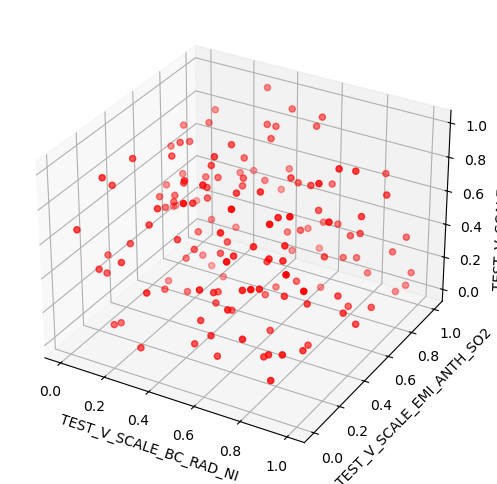

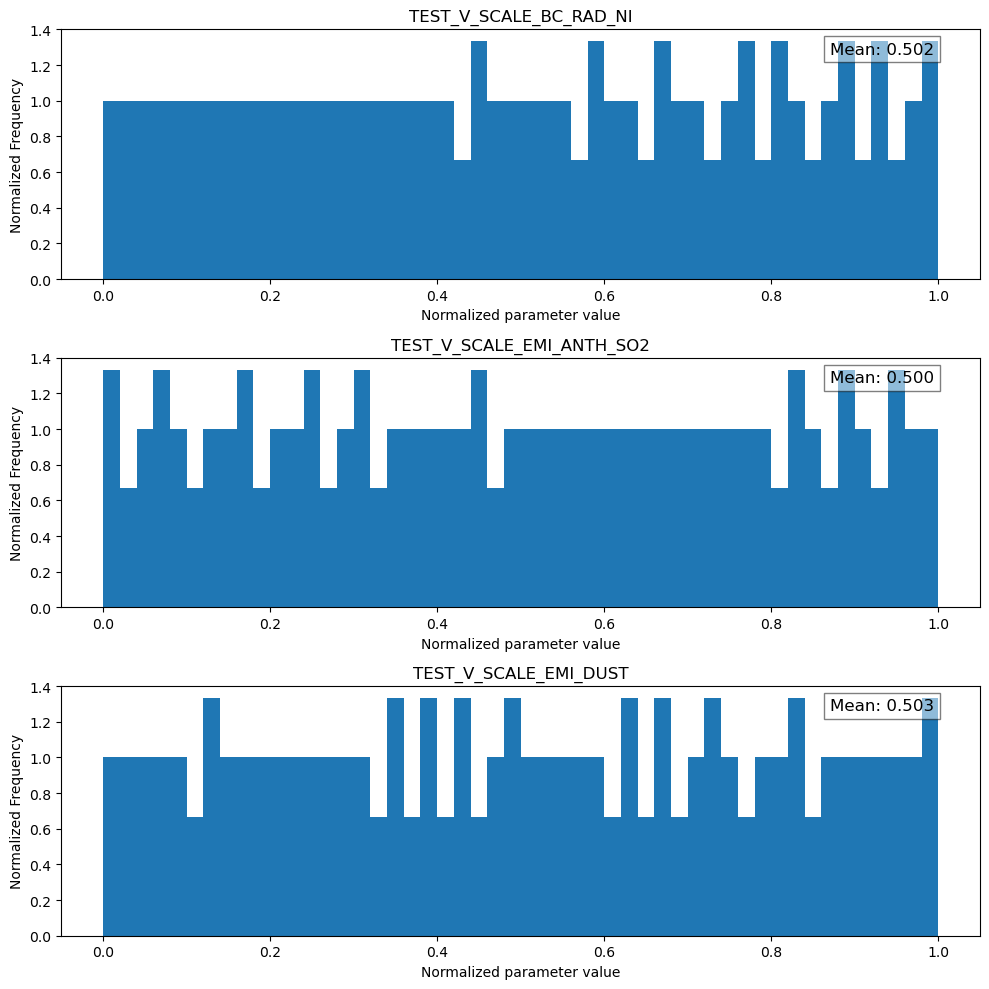

In [277]:
# Generate LHS samples
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs
from mpl_toolkits.mplot3d import Axes3D

# Normalize data to the range [0, 1] (if necessary)
scaler = MinMaxScaler()
samples_normalized = scaler.fit_transform(scale)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
#plt.figure(figsize=(12, 6))

para1 = 0
para2 = 7
para3 = 8
parameter_index = [para1,para2,para3]
indexed_parameter_names = names[parameter_index]
# Plot for Latin Hypercube Sampling

Data = [samples_normalized[:, para1], samples_normalized[:, para2], samples_normalized[:, para3]]
data = np.array(Data)
# Plot the normalized LHS samples
ax.scatter(samples_normalized[:, para1], samples_normalized[:, para2], samples_normalized[:, para3], c='r', marker='o')

# Set labels
ax.set_xlabel(f'{names[para1]}')
ax.set_ylabel(f'{names[para2]}')
ax.set_zlabel(f'{names[para3]}')

# Show the plot
plt.show()


# Compute means of each dimension
means = np.mean(Data, axis=1)

# Create a figure with subplots for histograms
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Plot histograms for each dimension
for i, param in zip(range(num_dimensions),parameter_index):
    ax = axes[i]
    ax.hist(samples_normalized[:, param], bins=50, edgecolor='None', density=True)
    ax.set_xlabel(f'Normalized parameter value')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(f'{indexed_parameter_names[i]}')
    
    # Annotate the mean value in the upper right
    mean_value = means[i]
    ax.text(0.95, 0.95, f'Mean: {mean_value:.3f}', 
            horizontalalignment='right', 
            verticalalignment='top', 
            transform=ax.transAxes, 
            fontsize=12, 
            bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout
plt.tight_layout()
plt.show()